<a href="https://colab.research.google.com/github/aSafarpoor/Traffic-Sign-Detection-DIPFinalProject-/blob/main/wiener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from scipy.ndimage import convolve
import seaborn as sns
import pandas as pd

In [7]:
from scipy.signal import convolve2d

--2022-08-10 23:01:08--  https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00008.ppm?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/raw/main/trafficimage/00008.ppm [following]
--2022-08-10 23:01:08--  https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/raw/main/trafficimage/00008.ppm
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/trafficimage/00008.ppm [following]
--2022-08-10 23:01:08--  https://raw.githubusercontent.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/main/trafficimage/00008.ppm
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 1

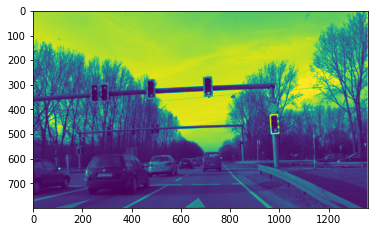

In [135]:
!wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/trafficimage/00008.ppm?raw=true
original = cv2.imread('00008.ppm?raw=true',cv2.IMREAD_GRAYSCALE)/255
plt.imshow(original)

In [136]:
im = np.copy(original)

In [148]:
im = np.zeros(im.shape)
im[20:140,:] = 255
im[100:250,500:650] = 200
im[:,140:350] = 150
im[:,940:950] = 250


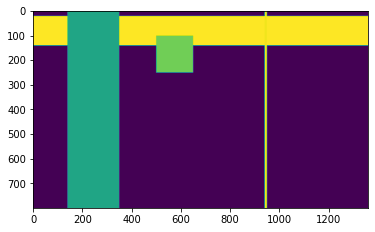

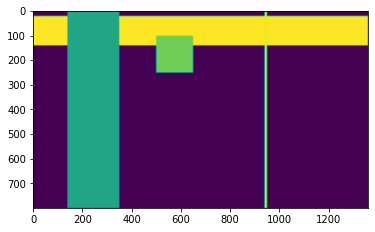

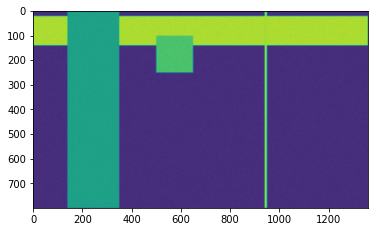

In [149]:
plt.imshow(im);plt.show()
psf = np.ones((5,5)) / 5*5
im2 = convolve2d(im,psf,'same')
plt.imshow(im2);plt.show()
im3 = im2 + 0.1 * im2.std() * np.random.standard_normal(im2.shape)
plt.imshow(im3);plt.show()

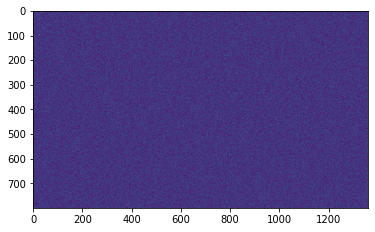

In [150]:
plt.imshow(np.abs(im3-im2));plt.show()

In [151]:
imsize = im.shape[0]*im.shape[1]

In [152]:
from skimage import restoration

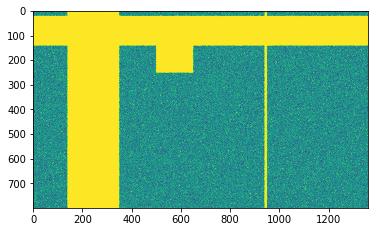

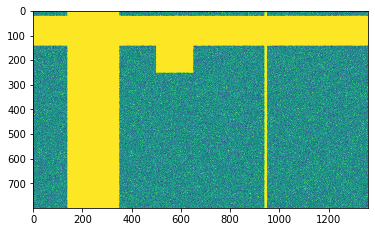

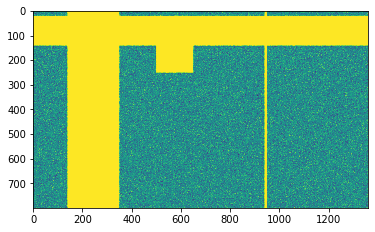

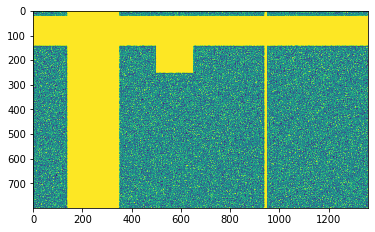

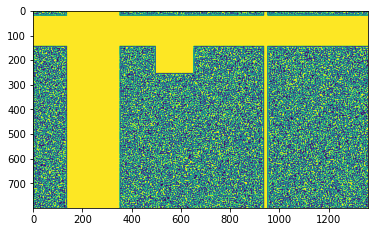

In [153]:
w1 = restoration.wiener(im3,psf,1)
w2 = restoration.wiener(im3,psf,2)
w3 = restoration.wiener(im3,psf,3)

w10 = restoration.wiener(im3,psf,10)
w100 = restoration.wiener(im3,psf,100)

plt.imshow(w1);plt.show()
plt.imshow(w2);plt.show()
plt.imshow(w3);plt.show()

plt.imshow(w10);plt.show()
plt.imshow(w100);plt.show()


In [154]:
print(round(np.abs(im-im2).sum()/imsize,2),round(np.abs(im-im3).sum()/imsize,2))

1433.23 1562.0


In [155]:
im*=255
im3*=255
im2*=255
w1*=255
w2*=255
w3*=255
w10*=255
w100*=255

In [156]:
def normalizer(im):
    ma = im.max()
    mi = im.min()
    return ((im-mi)/(ma-mi))*255

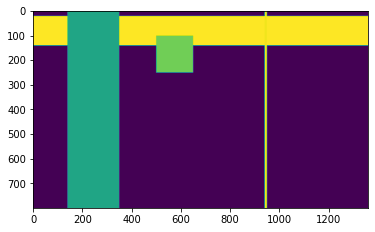

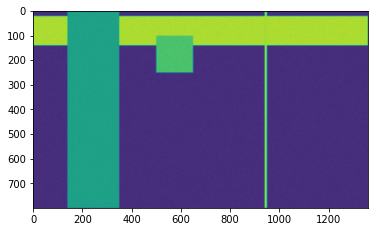

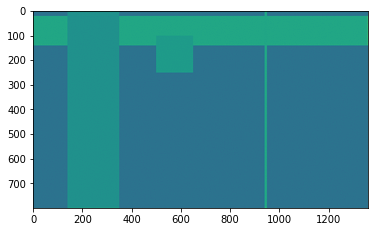

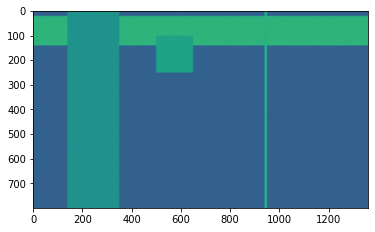

In [157]:
kernel1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])


plt.imshow(im);plt.show()
plt.imshow(im3);plt.show()

# psf = kernel1
imsharp1 = convolve2d(im3,kernel1,'same')
imsharp2 = convolve2d(im3,kernel2,'same')
plt.imshow(imsharp1);plt.show()
plt.imshow(imsharp2);plt.show()


In [158]:
print(' im \n pixel_avg:\n--->',round(np.abs(im).sum()/imsize,5),' --> ',round(cv2.Laplacian(im, cv2.CV_64F).var(),4))
print('\n im2 \n--->',round(np.abs(im-im2).sum()/imsize,5),' --> ',round(cv2.Laplacian(im2, cv2.CV_64F).var(),4))
print('\n im3 \n--->',round(np.abs(im-im3).sum()/imsize,5),' --> ',round(cv2.Laplacian(im3, cv2.CV_64F).var(),4))

print('\n w1 \n--->',round(np.abs(im-w1).sum()/imsize,5),' --> ',round(cv2.Laplacian(w1, cv2.CV_64F).var(),4))
print('\n w2 \n--->',round(np.abs(im-w2).sum()/imsize,5),' --> ',round(cv2.Laplacian(w2, cv2.CV_64F).var(),4))
print('\n w3 \n--->',round(np.abs(im-w3).sum()/imsize,5),' --> ',round(cv2.Laplacian(w3, cv2.CV_64F).var(),4))

print('\n w10 \n--->',round(np.abs(im-w10).sum()/imsize,5),' --> ',round(cv2.Laplacian(w10, cv2.CV_64F).var(),4))
print('\n w100 \n--->',round(np.abs(im-w100).sum()/imsize,5),' --> ',round(cv2.Laplacian(w100, cv2.CV_64F).var(),4))

print('\n sharp \n--->',round(np.abs(im-imsharp).sum()/imsize,5),' --> ',round(cv2.Laplacian(imsharp, cv2.CV_64F).var(),4))

 im 
 pixel_avg:
---> 15247.03125  -->  32630513.2031

 im2 
---> 365474.53125  -->  1003005332.0068

 im3 
---> 398309.84435  -->  72559277002.8564

 w1 
---> 15345.06573  -->  473245.6098

 w2 
---> 15344.11488  -->  428480.6427

 w3 
---> 15343.31627  -->  400084.5914

 w10 
---> 15340.39932  -->  302982.7664

 w100 
---> 15331.33573  -->  128961.1902

 sharp 
---> 15290.05772  -->  24657.9187
